In [38]:
# 3D forest height map with python
# Nicolas Corti
# insprired by Milos Popovic https://www.youtube.com/watch?v=4ScYWPMzy6E
# NicoLang https://github.com/langnico/global-canopy-height-model
# https://gee-community-catalog.org/projects/canopy/
# https://www.research-collection.ethz.ch/handle/20.500.11850/609802
# https://arxiv.org/abs/2204.08322


# instrucctions
# 1. get all needed canopy height tifs
# 2. merge tifs together (create a mosaic)
# 3. get country boundaries
# 4. clip mosaic with country h


In [40]:
import wget
wget.download('https://libdrive.ethz.ch/index.php/s/cO8or7iOe5dT2Rt/download?path=%2F&files=tile_index.html')

'tile_index.html'

In [41]:
ecuador_chm = ['https://libdrive.ethz.ch/index.php/s/cO8or7iOe5dT2Rt/download?path=%2F3deg_cogs&files=ETH_GlobalCanopyHeight_10m_2020_N00W081_Map.tif', 'https://libdrive.ethz.ch/index.php/s/cO8or7iOe5dT2Rt/download?path=%2F3deg_cogs&files=ETH_GlobalCanopyHeight_10m_2020_N00W078_Map.tif', 'https://libdrive.ethz.ch/index.php/s/cO8or7iOe5dT2Rt/download?path=%2F3deg_cogs&files=ETH_GlobalCanopyHeight_10m_2020_S03W081_Map.tif', 'https://libdrive.ethz.ch/index.php/s/cO8or7iOe5dT2Rt/download?path=%2F3deg_cogs&files=ETH_GlobalCanopyHeight_10m_2020_S03W078_Map.tif', 'https://libdrive.ethz.ch/index.php/s/cO8or7iOe5dT2Rt/download?path=%2F3deg_cogs&files=ETH_GlobalCanopyHeight_10m_2020_S06W081_Map.tif', 'https://libdrive.ethz.ch/index.php/s/cO8or7iOe5dT2Rt/download?path=%2F3deg_cogs&files=ETH_GlobalCanopyHeight_10m_2020_S06W078_Map.tif']

In [42]:
ecuador_chm

['https://libdrive.ethz.ch/index.php/s/cO8or7iOe5dT2Rt/download?path=%2F3deg_cogs&files=ETH_GlobalCanopyHeight_10m_2020_N00W081_Map.tif',
 'https://libdrive.ethz.ch/index.php/s/cO8or7iOe5dT2Rt/download?path=%2F3deg_cogs&files=ETH_GlobalCanopyHeight_10m_2020_N00W078_Map.tif',
 'https://libdrive.ethz.ch/index.php/s/cO8or7iOe5dT2Rt/download?path=%2F3deg_cogs&files=ETH_GlobalCanopyHeight_10m_2020_S03W081_Map.tif',
 'https://libdrive.ethz.ch/index.php/s/cO8or7iOe5dT2Rt/download?path=%2F3deg_cogs&files=ETH_GlobalCanopyHeight_10m_2020_S03W078_Map.tif',
 'https://libdrive.ethz.ch/index.php/s/cO8or7iOe5dT2Rt/download?path=%2F3deg_cogs&files=ETH_GlobalCanopyHeight_10m_2020_S06W081_Map.tif',
 'https://libdrive.ethz.ch/index.php/s/cO8or7iOe5dT2Rt/download?path=%2F3deg_cogs&files=ETH_GlobalCanopyHeight_10m_2020_S06W078_Map.tif']

In [5]:
for i in ecuador_chm:
    wget.download(i)

In [44]:
import os
dataset_list = os.listdir(path='./canopy-height-models')


In [45]:
from osgeo import gdal

In [46]:
driver = gdal.GetDriverByName('GTiff')

In [47]:
dataset = gdal.Open(f"./canopy-height-models/{dataset_list[0]}")

In [48]:
projection = dataset.GetProjection()
geotransform = dataset.GetGeoTransform()


In [49]:
band = dataset.GetRasterBand(1)
array = band.ReadAsArray()

In [54]:
import matplotlib.pyplot as plt

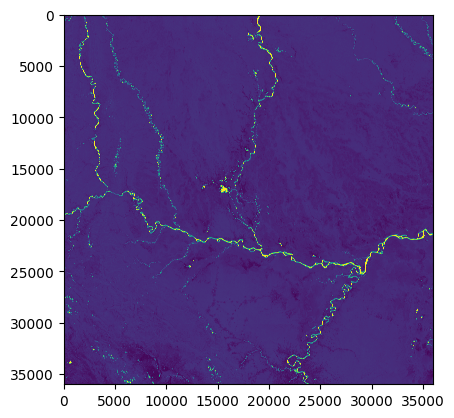

In [33]:
plt.figure()
plt.imshow(array)

In [66]:
dataset_list

['ETH_GlobalCanopyHeight_10m_2020_S06W078_Map.tif',
 'ETH_GlobalCanopyHeight_10m_2020_S03W078_Map.tif',
 'ETH_GlobalCanopyHeight_10m_2020_N00W078_Map.tif',
 'ETH_GlobalCanopyHeight_10m_2020_N00W081_Map.tif',
 'ETH_GlobalCanopyHeight_10m_2020_S06W081_Map.tif',
 'ETH_GlobalCanopyHeight_10m_2020_S03W081_Map.tif']

In [75]:
ds_list = list()
for i in dataset_list:
    ds_list.append(f"./canopy-height-models/{i}")
    

In [76]:
ds_list

['./canopy-height-models/ETH_GlobalCanopyHeight_10m_2020_S06W078_Map.tif',
 './canopy-height-models/ETH_GlobalCanopyHeight_10m_2020_S03W078_Map.tif',
 './canopy-height-models/ETH_GlobalCanopyHeight_10m_2020_N00W078_Map.tif',
 './canopy-height-models/ETH_GlobalCanopyHeight_10m_2020_N00W081_Map.tif',
 './canopy-height-models/ETH_GlobalCanopyHeight_10m_2020_S06W081_Map.tif',
 './canopy-height-models/ETH_GlobalCanopyHeight_10m_2020_S03W081_Map.tif']

In [77]:
vrt = gdal.BuildVRT('merged.vrt', ds_list)

In [79]:
gdal.Translate('merged.tif', vrt)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7ccbd145d0b0> >

<Axes: >

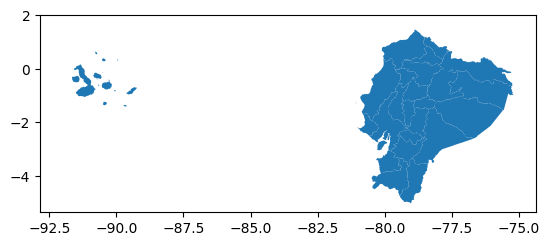

In [86]:
import geopandas as gpd
from gadm import GADMDownloader

downloader = GADMDownloader(version="4.0")

country_name = "Ecuador"
ad_level = 1
gdf = downloader.get_shape_data_by_country_name(country_name=country_name, ad_level=ad_level)

assert isinstance(gdf, gpd.GeoDataFrame)
gdf.plot()

In [87]:
gdf

,ID_0,COUNTRY,ID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry
0,ECU,Ecuador,ECU.1_1,Azuay,,,Provincia,Province,01,EC.AZ,,"MULTIPOLYGON (((-79.05279 -3.46212, -79.05272 ..."
1,ECU,Ecuador,ECU.2_1,Bolivar,,,Provincia,Province,02,EC.BO,,"MULTIPOLYGON (((-79.05841 -1.18669, -79.05827 ..."
2,ECU,Ecuador,ECU.3_1,Cañar,,,Provincia,Province,03,EC.CN,,"MULTIPOLYGON (((-78.91735 -2.83270, -78.91748 ..."
3,ECU,Ecuador,ECU.4_1,Carchi,,,Provincia,Province,04,EC.CR,,"MULTIPOLYGON (((-77.75994 0.83915, -77.75986 0..."
4,ECU,Ecuador,ECU.5_1,Chimborazo,,,Provincia,Province,06,EC.CB,,"MULTIPOLYGON (((-78.97595 -2.38986, -78.97594 ..."
5,ECU,Ecuador,ECU.6_1,Cotopaxi,,,Provincia,Province,05,EC.CT,,"MULTIPOLYGON (((-78.59009 -1.11932, -78.59013 ..."
6,ECU,Ecuador,ECU.7_1,El Oro,,,Provincia,Province,07,EC.EO,,"MULTIPOLYGON (((-79.41537 -3.72698, -79.41514 ..."
7,ECU,Ecuador,ECU.8_1,Esmeraldas,,,Provincia,Province,08,EC.ES,,"MULTIPOLYGON (((-79.60432 -0.02106, -79.60408 ..."
8,ECU,Ecuador,ECU.9_1,Galápagos,,,Provincia,Province,20,EC.GA,,"MULTIPOLYGON (((-89.66605 -1.34471, -89.66586 ..."
9,ECU,Ecuador,ECU.10_1,Guayas,,,Provincia,Province,09,EC.GU,,"MULTIPOLYGON (((-79.64655 -2.98921, -79.64678 ..."


In [ ]:
gdf.